Accuracy: 0.8117647058823529
Confusion Matrix:
 [[124  38]
 [ 26 152]]
AUC: 0.9056041059786378


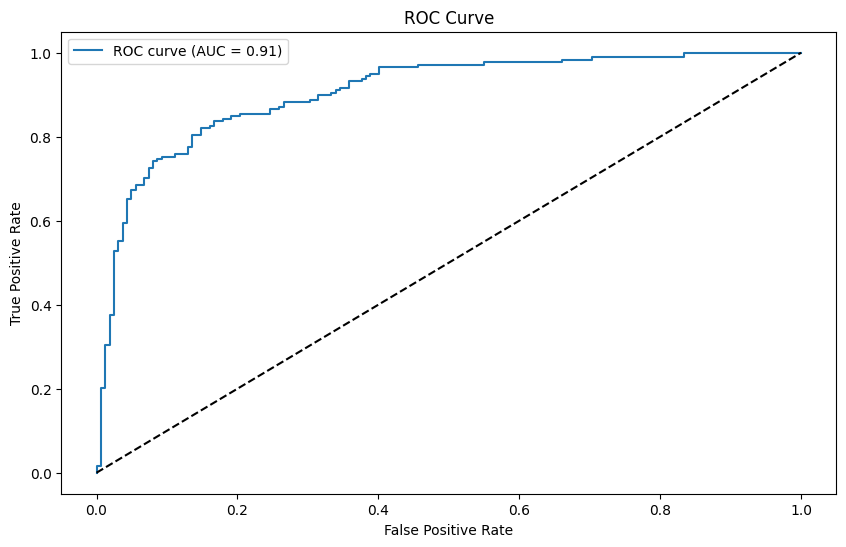

/var/folders/3g/7mz90_v15mnfmnvkr1bb3qgh0000gp/T/ipykernel_1023/372719924.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=df_importance, palette="viridis")


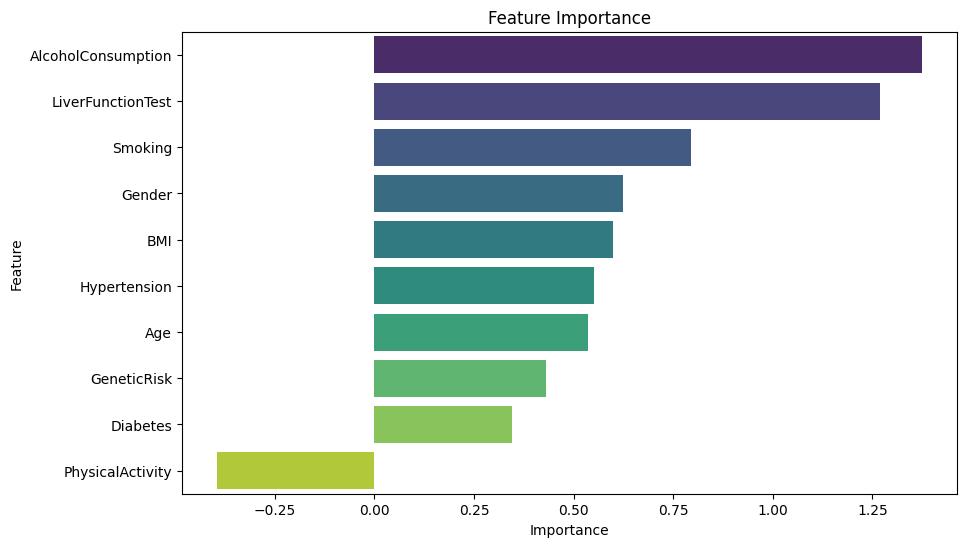

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

# データの読み込み
data = pd.read_csv("/Users/madoka/trantura_ondisk/practice/logistic regression annalysis/logistic reglession annalysis_data/Liver_disease_data.csv")

# 特徴量とターゲット変数の分割
X = data.drop("Diagnosis", axis=1)
y = data["Diagnosis"]

# データのスケーリング
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ロジスティック回帰モデルの作成と学習
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# テストデータでの予測
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 混同行列の表示
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# ROC曲線とAUCの計算
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

# ROC曲線のプロット
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# 特徴量の重要度を取得
feature_importance = model.coef_[0]

# データフレームに変換
df_importance = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})

# 特徴量の重要度を降順にソート
df_importance = df_importance.sort_values(by="Importance", ascending=False)

# グラフの作成
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=df_importance, palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()